In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
x = df.drop(['Id','Species'],axis = 1)
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=12)
x_train.shape


(105, 4)

In [11]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)
cnf_matrix= confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:", cnf_matrix)

accuracy= accuracy_score(y_train,y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix: [[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [17]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix= confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: \n", cnf_matrix)

accuracy= accuracy_score(y_test,y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix: 
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Accuracy : 0.9777777777777777
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



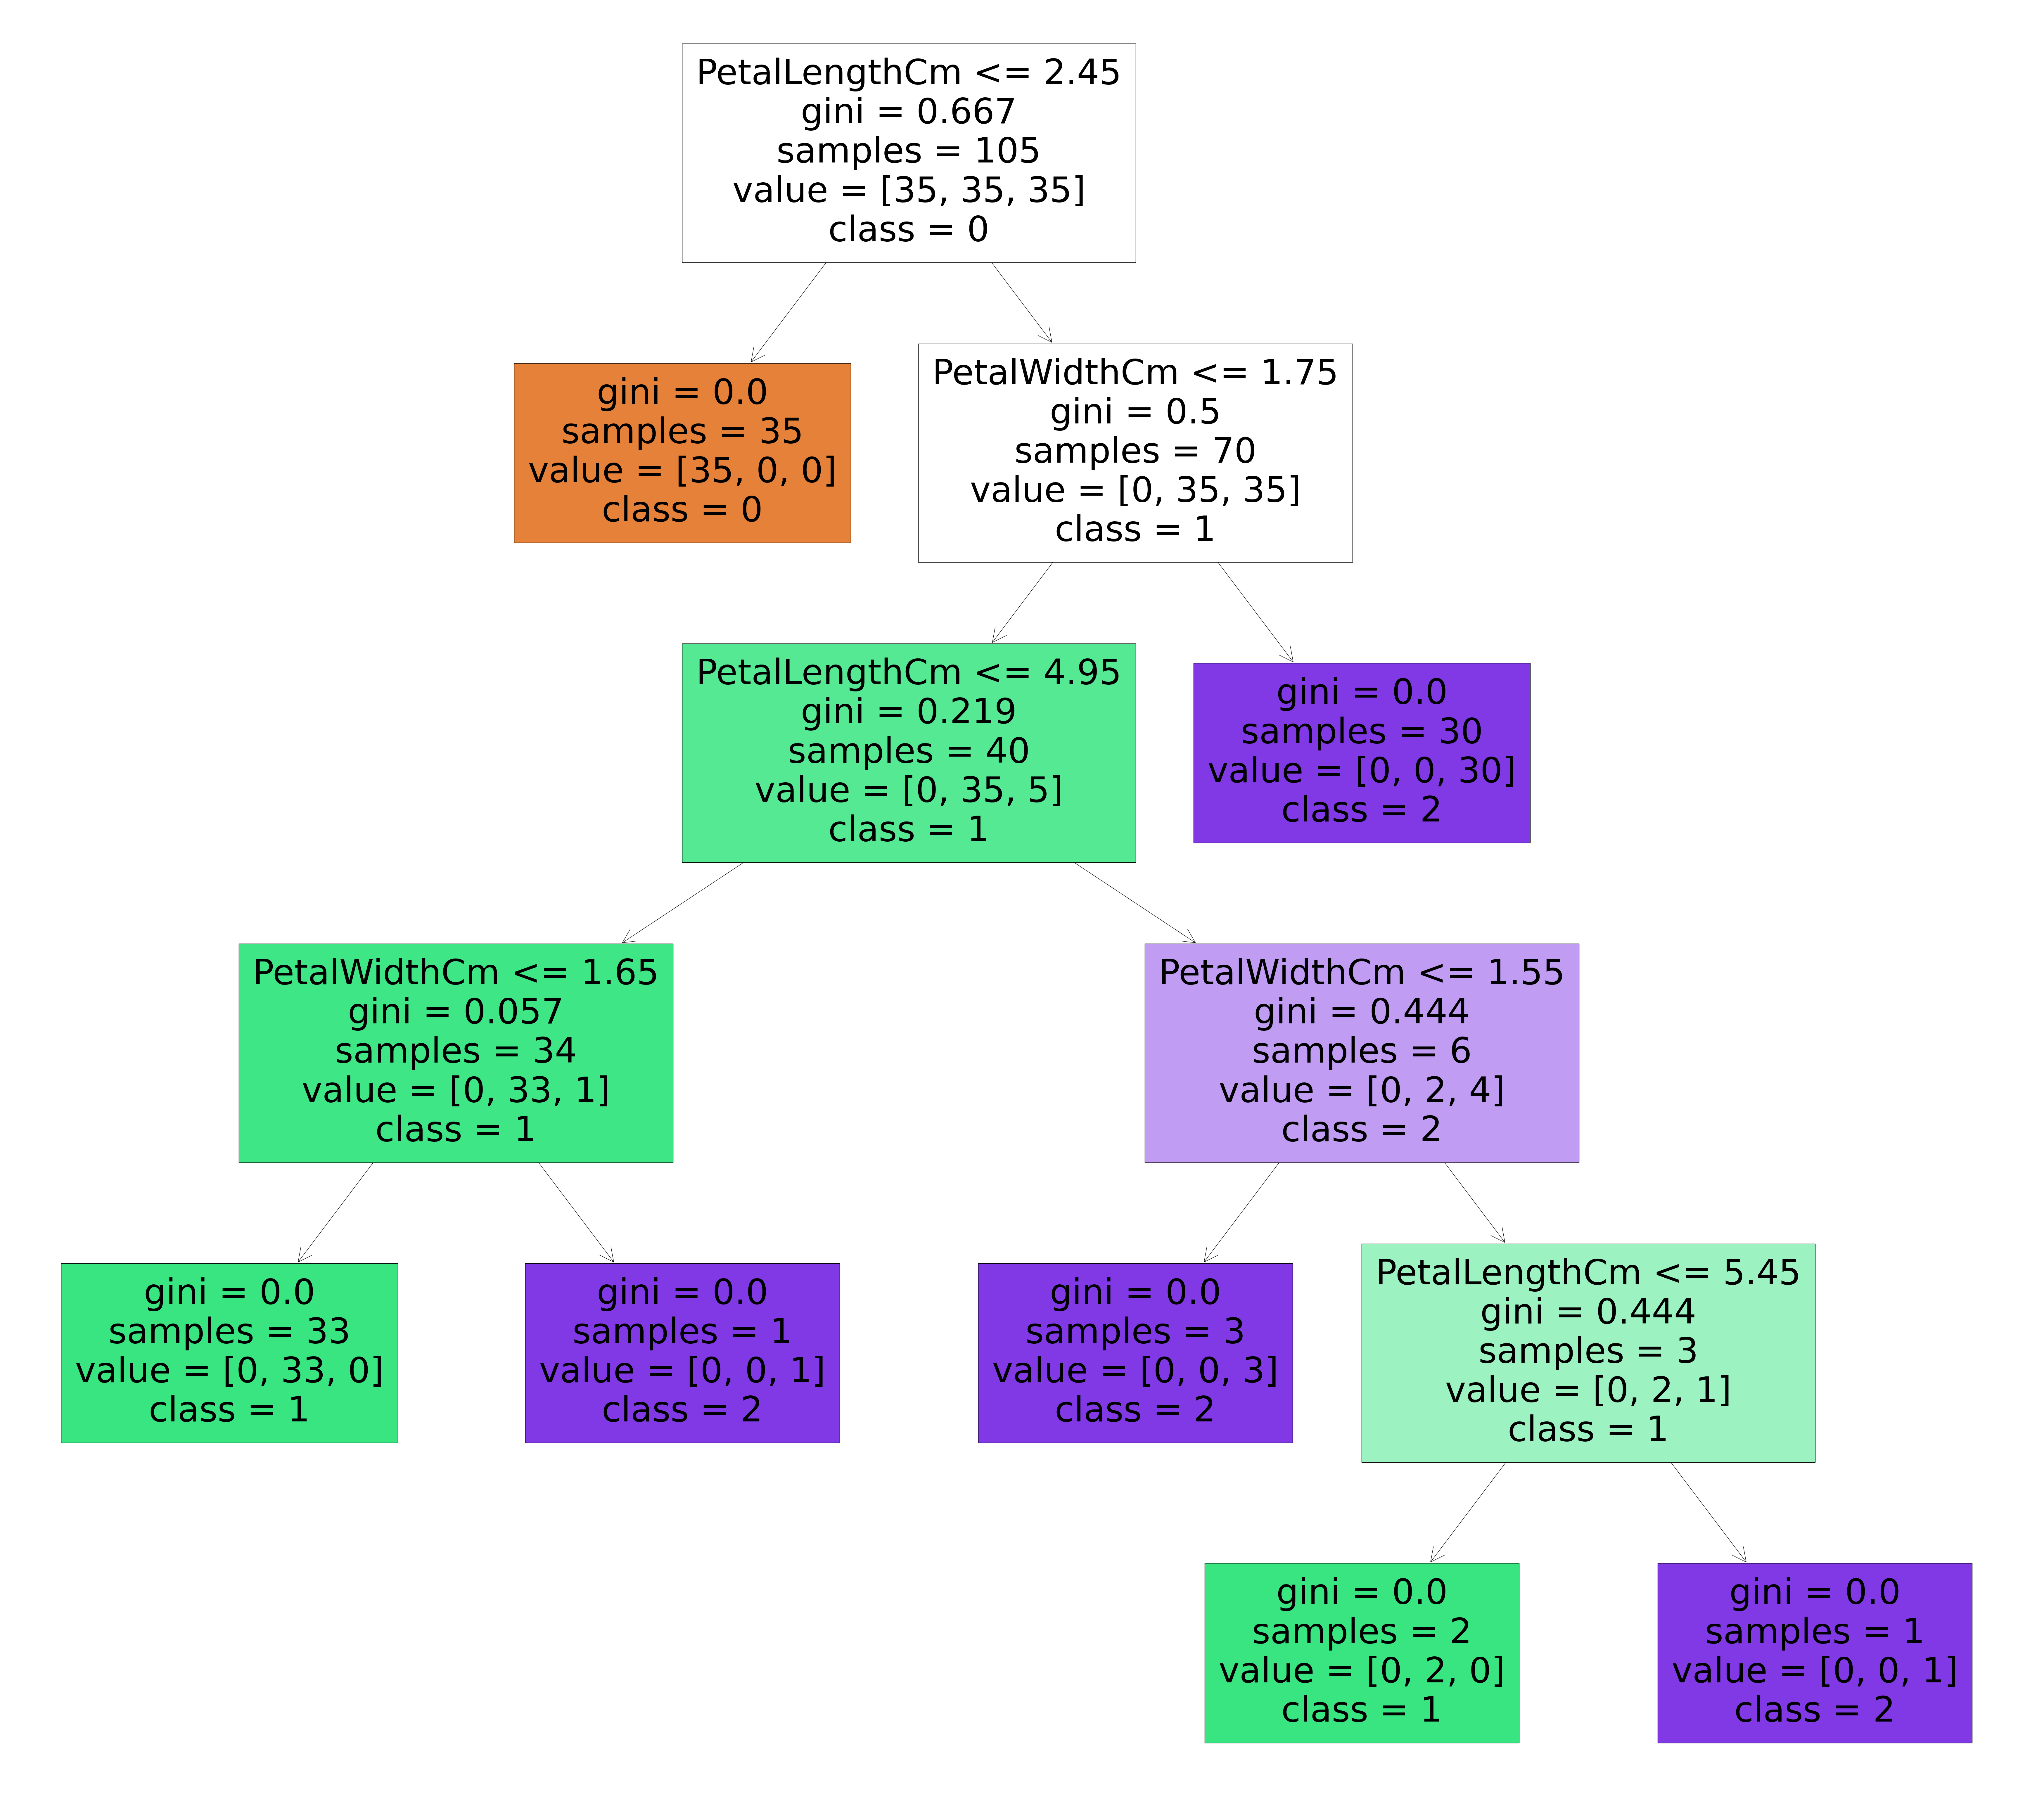

In [18]:
plt.figure(figsize = (90,80))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1', '2'], filled=True)
plt.savefig('DT_clf_without_hyp.png')

In [23]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(2,10),
            "min_samples_split" : range(5,18),
            "min_samples_leaf" : range(2,14),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = GridSearchCV(dt_clf, hyp_grid, verbose=1, cv = 4, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 4 folds for each of 2496 candidates, totalling 9984 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 14),
                         'min_samples_split': range(5, 18)},
             verbose=1)

In [25]:
df_clf= gscv_dt_clf.best_estimator_
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [27]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Accuracy : 0.9777777777777777
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



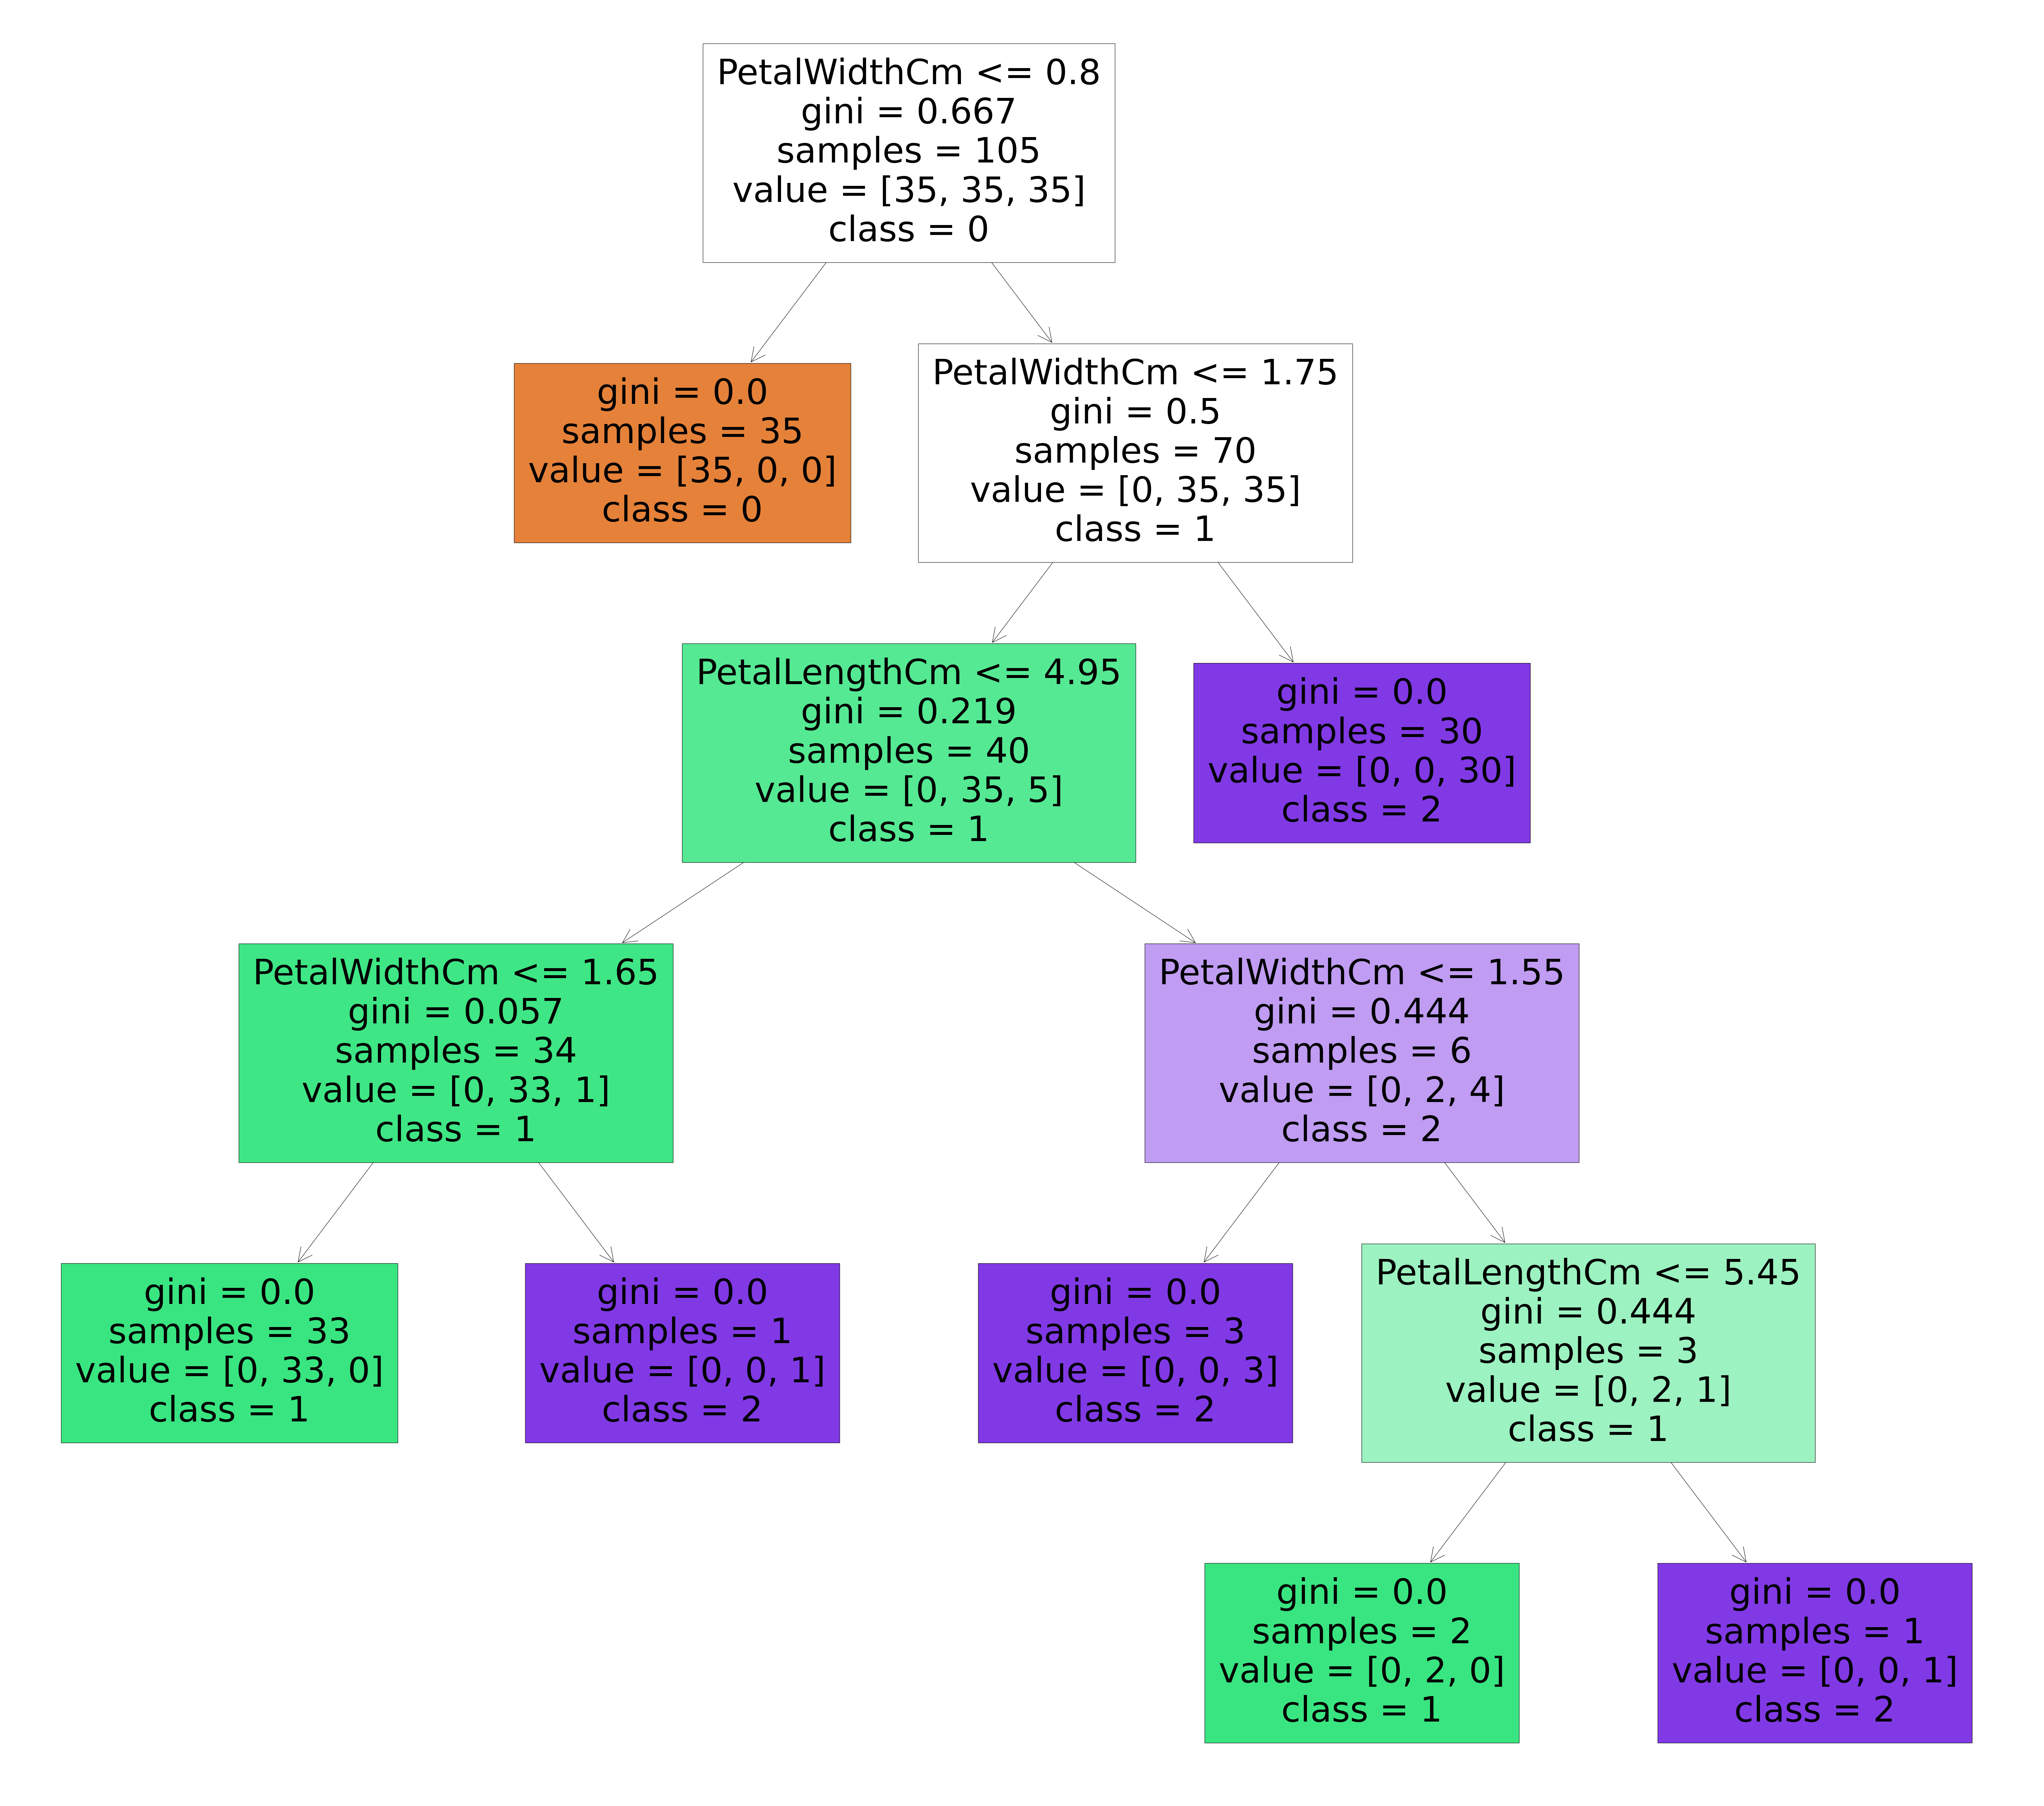

In [28]:
plt.figure(figsize = (90,80))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1', '2'], filled=True)
plt.savefig('DT_clf_with_hyp.png')

In [29]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(2,7),
            "min_samples_split" : range(5,15),
            "min_samples_leaf" : range(2,10),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = RandomizedSearchCV(dt_clf, hyp_grid, verbose=1, cv = 4, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 7),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(5, 15)},
                   verbose=1)

In [30]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=13)

In [31]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[35  0  0]
 [ 0 33  2]
 [ 0  1 34]]
Accuracy : 0.9714285714285714
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      0.94      0.96        35
 Iris-virginica       0.94      0.97      0.96        35

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



In [32]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Accuracy : 0.9777777777777777
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

